In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(48.783933077165386, -4.205113689166808),
 (-16.463922884761686, 52.23329366577141),
 (-41.115369632434366, -14.007644857511735),
 (-44.66796334718798, -72.21924396413587),
 (-61.71150560710447, 33.64819382746785),
 (-78.46497109344992, -52.43089826431412),
 (11.742582230280874, 144.30123820702028),
 (89.2609846407583, 143.25665039395028),
 (-25.58459613164591, 159.481073182018),
 (54.325329721573524, -79.57322818868958),
 (-54.29404058885349, 92.31500081276135),
 (48.80143123754061, 50.99987200897428),
 (39.017620240863124, 37.984036127809105),
 (6.63975582788207, -32.70291513574816),
 (-40.62316702463347, -5.7525852671229245),
 (-63.07645663160442, -58.99279044732968),
 (54.94236377195119, -111.3196849100511),
 (-6.819227390461364, 24.273256094022855),
 (30.291853345937668, -82.42053353270936),
 (-31.42621799711946, -145.95282051281634),
 (-27.685091565672657, -9.868089435338959),
 (-7.90257832621532, 45.95234180277461),
 (5.573208700342704, -111.28097550704894),
 (-19.3334584195275

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10ec51f53fab2eb780ceb0558541a08


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | landerneau
Processing Record 2 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | coihaique
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 13 of Set 1 | malatya
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | bonnyville
Processing Record 16 of Set 1 | gandajika
Processing Record 17 of Set 1 | lake city
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | mitsamiouli
Processing Record 20 of Set

Processing Record 38 of Set 4 | mangrol
Processing Record 39 of Set 4 | kichera
Processing Record 40 of Set 4 | ulaangom
Processing Record 41 of Set 4 | watertown
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | ulaanbaatar
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | rundu
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | laguna de duero
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | olinda
Processing Record 1 of Set 5 | pangai
Processing Record 2 of Set 5 | mentok
City not found. Skipping...
Processing Record 3 of Set 5 | daru
Processing Record 4 of Set 5 | bheramara
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | abu kamal
Processing Record 7 of Set 5 | yugorsk
Processing Record 8 of Set 5 | shaoguan
Processing Record 9 of Set 5 | kahului
Processing Record 10 of Set 5 | mutare
Processing Record 11 of Set 5 | windhoek
Processing 

Processing Record 25 of Set 8 | sydney
Processing Record 26 of Set 8 | lokosovo
Processing Record 27 of Set 8 | coahuayana
Processing Record 28 of Set 8 | arlit
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | rorvik
Processing Record 31 of Set 8 | mayahi
Processing Record 32 of Set 8 | boden
Processing Record 33 of Set 8 | susner
Processing Record 34 of Set 8 | fort nelson
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | maarianhamina
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | tarauaca
Processing Record 39 of Set 8 | susangerd
Processing Record 40 of Set 8 | setermoen
Processing Record 41 of Set 8 | turayf
Processing Record 42 of Set 8 | acapulco
Processing Record 43 of Set 8 | akalkot
Processing Record 44 of Set 8 | laguna
Processing Record 45 of Set 8 | mananjary
Processing Record 46 of Set 8 | rosetta
Processing Record 47 of Set 8 | omboue
Processing Record 48 of Set 8 | tazovskiy
Processing Reco

Processing Record 13 of Set 12 | kayankulam
Processing Record 14 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 15 of Set 12 | nishihara
Processing Record 16 of Set 12 | ahome
Processing Record 17 of Set 12 | rawson
Processing Record 18 of Set 12 | songkhla
Processing Record 19 of Set 12 | ambanja
Processing Record 20 of Set 12 | tautira
Processing Record 21 of Set 12 | viligili
City not found. Skipping...
Processing Record 22 of Set 12 | mojo
Processing Record 23 of Set 12 | pandan
Processing Record 24 of Set 12 | wanning
Processing Record 25 of Set 12 | rosarito
Processing Record 26 of Set 12 | kuching
Processing Record 27 of Set 12 | monte patria
Processing Record 28 of Set 12 | hamilton
Processing Record 29 of Set 12 | mosquera
Processing Record 30 of Set 12 | warrnambool
Processing Record 31 of Set 12 | yemelyanovo
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | baherden
Processing Record 34 of Set 12 | hobyo
Processing Record 35 of

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Landerneau,48.4525,-4.2525,63.79,74,75,19.57,FR,2021-08-08 17:04:28
1,Jamestown,42.0970,-79.2353,82.09,65,75,5.99,US,2021-08-08 17:04:28
2,Coihaique,-45.5752,-72.0662,48.15,53,0,3.44,CL,2021-08-08 17:04:29
3,Port Alfred,-33.5906,26.8910,66.11,59,61,16.71,ZA,2021-08-08 17:04:29
4,Ushuaia,-54.8000,-68.3000,38.55,81,94,4.99,AR,2021-08-08 17:03:16
5,Airai,-8.9266,125.4092,54.70,87,37,1.68,TL,2021-08-08 17:04:29
6,Chokurdakh,70.6333,147.9167,50.94,62,82,7.76,RU,2021-08-08 17:04:30
7,Busselton,-33.6500,115.3333,56.08,85,38,23.55,AU,2021-08-08 17:04:30
8,Malatya,38.5000,38.0000,77.05,34,75,18.41,TR,2021-08-08 17:04:30
9,Sao Filipe,14.8961,-24.4956,79.97,78,18,9.06,CV,2021-08-08 17:04:31


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Landerneau,FR,2021-08-08 17:04:28,48.4525,-4.2525,63.79,74,75,19.57
1,Jamestown,US,2021-08-08 17:04:28,42.0970,-79.2353,82.09,65,75,5.99
2,Coihaique,CL,2021-08-08 17:04:29,-45.5752,-72.0662,48.15,53,0,3.44
3,Port Alfred,ZA,2021-08-08 17:04:29,-33.5906,26.8910,66.11,59,61,16.71
4,Ushuaia,AR,2021-08-08 17:03:16,-54.8000,-68.3000,38.55,81,94,4.99
5,Airai,TL,2021-08-08 17:04:29,-8.9266,125.4092,54.70,87,37,1.68
6,Chokurdakh,RU,2021-08-08 17:04:30,70.6333,147.9167,50.94,62,82,7.76
7,Busselton,AU,2021-08-08 17:04:30,-33.6500,115.3333,56.08,85,38,23.55
8,Malatya,TR,2021-08-08 17:04:30,38.5000,38.0000,77.05,34,75,18.41
9,Sao Filipe,CV,2021-08-08 17:04:31,14.8961,-24.4956,79.97,78,18,9.06


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

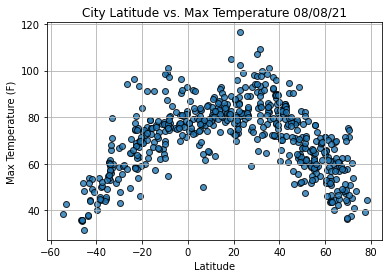

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

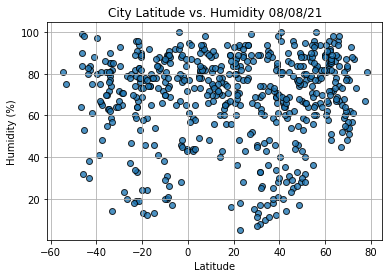

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

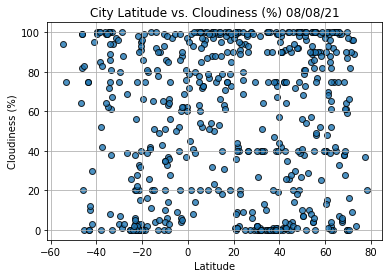

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

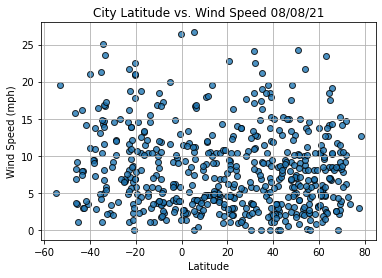

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Lat                      -46.1927
Lng                      168.8643
Max Temp                    35.47
Humidity                       99
Cloudiness                     99
Wind Speed                    3.6
Country                        NZ
Date          2021-08-08 17:04:32
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
553     True
554     True
555     True
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Landerneau,48.4525,-4.2525,63.79,74,75,19.57,FR,2021-08-08 17:04:28
1,Jamestown,42.0970,-79.2353,82.09,65,75,5.99,US,2021-08-08 17:04:28
6,Chokurdakh,70.6333,147.9167,50.94,62,82,7.76,RU,2021-08-08 17:04:30
8,Malatya,38.5000,38.0000,77.05,34,75,18.41,TR,2021-08-08 17:04:30
9,Sao Filipe,14.8961,-24.4956,79.97,78,18,9.06,CV,2021-08-08 17:04:31


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

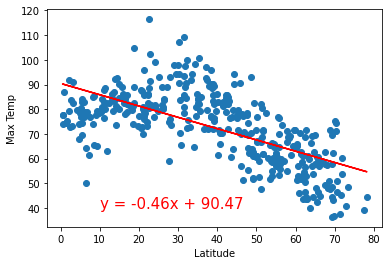

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

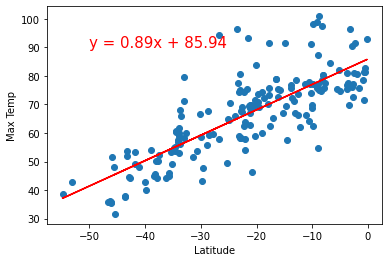

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

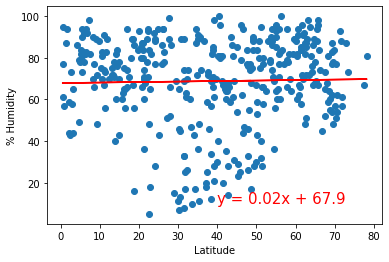

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

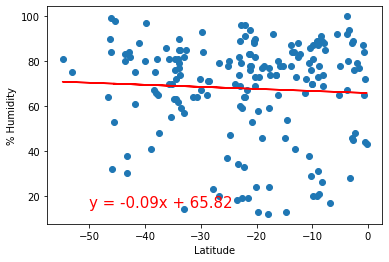

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

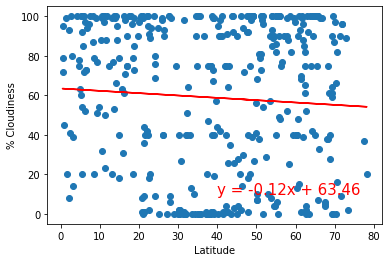

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

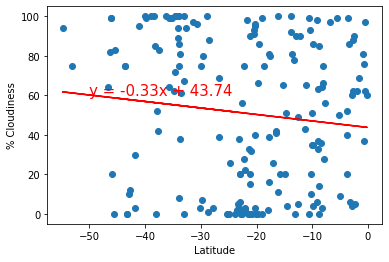

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

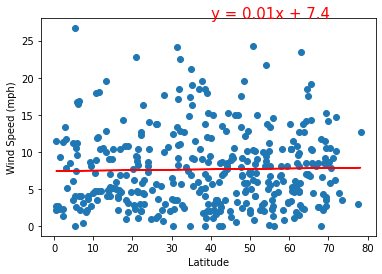

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,28))

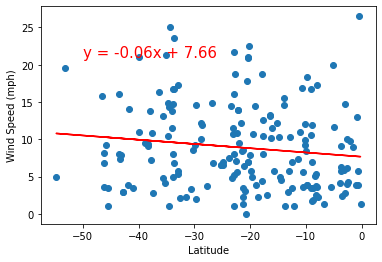

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,21))